In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_context('notebook')

# Here we focus only on data from Lausanne marathon 2016 

In [2]:
data = pd.read_pickle('../datasets/trial_dataset')
data.head()

,nom,nat,an,lieu,temps,cat/rang
0,Bekele-Clerc Alemitu,BEL,1976,Bern,"2:42.41,0",42-D40
1,Yerly Laurence,SUI,1972,Cernier,"2:51.45,8",42-D40
2,Vrajic Marija,CRO,1976,CRO-Zagreb,Maksimir,42-D40
3,Morall Zelah,SUI,1969,GB-Penzance,"2:53.43,2",42-D40
4,Annen-Lamard Sandra,SUI,1977,Ecublens,-----,42-D30


In [33]:
import requests as req
from bs4 import BeautifulSoup as bs
url = 'https://services.datasport.com/2016/lauf/lamara/rang091-001.htm'
r = req.get(url)
s = bs(r.text,'lxml')
s.find('h3')

<h3><a href=".">Lausanne Marathon 2016</a> - Marathon Hommes Overall</h3>

## Stats on age

**Ideas**:
- statistical tests for men and women age over time:
    1. variance analysis (F test in normal case)
    2. mean analysis (T-test/ Welch test)
    3. plot with p-value and some critical thresholds (0.2,0.1,0.05,0.01)
- interactive plot of age distribution over time for men and women

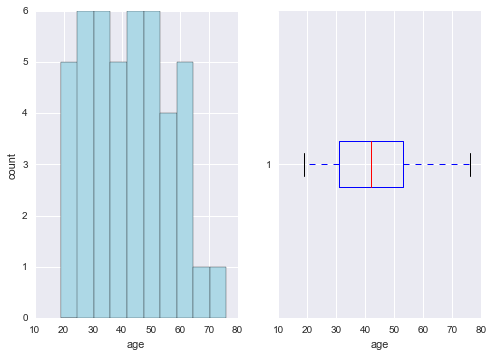

In [84]:
# get age of participants and plot its distribution
age = 2016 - data.an.value_counts().index.astype(int)
plt.subplot(1,2,1)
plt.hist(age,color='lightblue')
plt.xlabel('age')
plt.ylabel('count')
plt.subplot(1,2,2)
plt.boxplot(age,vert=False)
plt.xlabel('age')

## Stats on original country 
**Ideas**:
- interactive plot with nationality distribution over time

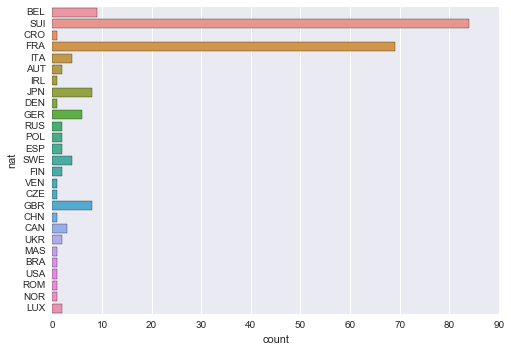

In [91]:
sns.countplot(y=data.nat)

## Stats on race time

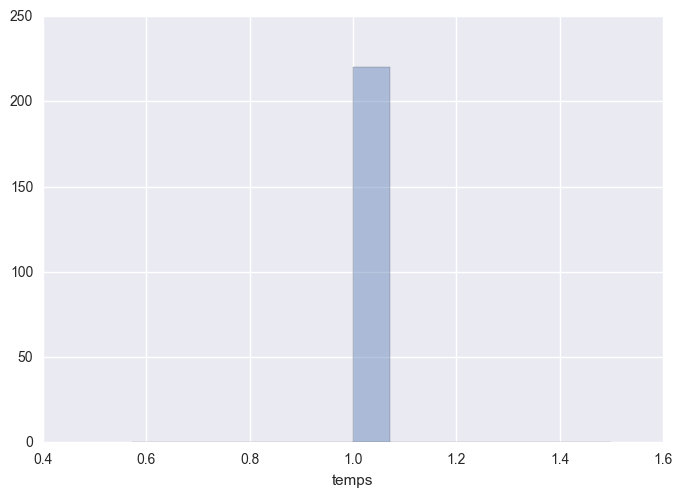

In [30]:
# sns.distplot(men_10km.temps,kde=False) 
# issues -->  due to the presence of strings --> due to issues on parsing!!